## **Table of Contents:**
* Introduction
* Import Libraries
* Getting the Data
* Data Exploration/Analysis
* Data Preprocessing
    - Check Missing Data and Visualize 
    - Check continuous and categorical data 
    - Feature Selection 
* Logestic Regression  
    - Run LR with different degress
    - Viz training and testing error. Check for overfit and Underfit
    - Hyperparameter Tuning   
* Further Evaluation 
    - Confusion Matrix
    - Precision and Recall 
    - F-Score
    - Precision Recall Curve
    - ROC AUC Curve
    - ROC AUC Score
* Submission
* Summary

# **Introduction**

Develop a logistic regression model that can be used to predict candidates who are likely to join after accepting the offer. What are the varoiables having statistical significance on renege

How would you interpret Sensitivity, Specivity and model accuracy. Calculate AUC. Comment on LR model developed using AUC

How will u handle outlier

What will be model deployment strategy



# **Import Libraries**

In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
import warnings
warnings.filterwarnings('ignore')


In [78]:
file_path = '/content/sample_data/IMB533_HR Analytics without Missing Values.csv'
df = pd.read_csv(file_path)
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [79]:
# drop unwanted coluns 
df = df.drop(['SLNO', 'Candidate.Ref'], axis=1)
df.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [80]:
# Converting absoulte age to age group , making it categorical feature  

df['Age'] = df['Age'].astype(int)
df.loc[ df['Age'] <= 20, 'Age'] = 0
df.loc[(df['Age'] > 20) & (df['Age'] <= 30), 'Age'] = 1
df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age'] = 2
df.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age'] = 3
df.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age'] = 4
df.loc[ df['Age'] > 60, 'Age'] = 5

df.Age.unique()

array([2, 1, 3, 0, 5, 4])

In [81]:
df.head()

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,2,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,2,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,1,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,2,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,2,Joined


In [0]:
categorical_cols = ['DOJ.Extended', 'Age', 'Offered.band', 'Joining.Bonus', 'Candidate.Source', 'Candidate.relocate.actual', 'Gender', 'LOB', 'Location', 'Status']
continuous_cols = list(set(df.columns) - set(categorical_cols))


In [83]:
#Convert categorical strings into categorical digits 
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df.head()


,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,2,0
1,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,2,0
2,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,1,0
3,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,2,0
4,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,2,0


In [84]:
# Min_Max  Normalize continous data 


df[continuous_cols] = df[continuous_cols].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
df[continuous_cols].head()

,Percent.difference.CTC,Duration.to.accept.offer,Pecent.hike.expected.in.CTC,Notice.period,Rex.in.Yrs,Percent.hike.offered.in.CTC
0,0.299861,0.535398,0.112086,0.250,0.291667,0.138525
1,0.673265,0.544248,0.277252,0.250,0.333333,0.715336
2,0.183162,0.511062,0.260546,0.375,0.166667,0.194319
3,0.183162,0.561947,0.260546,0.250,0.166667,0.194319
4,0.183162,0.506637,0.259963,1.000,0.250000,0.193849


# **Feature  Selection**

In [85]:
features = df.iloc[:,0:15]
classes = df['Status']
X = np.array(features)
y = np.array(classes).T
print('Feature set shape:', X.shape)
print('Response class shape:', y.shape)

Feature set shape: (9011, 15)
Response class shape: (9011,)


Let's use Logistic Regression for feature **selection**



In [86]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
selected_features = [val for idx,val in enumerate(features.columns) if fit.support_[idx]]
print("Num Features: "+ str(fit.n_features_))  
print("Selected Features: "+ str(selected_features)) 
print("All Features: "+ str(list(features.columns)))
print("Feature Ranking: " + str(fit.ranking_))

Num Features: 3
Selected Features: ['Notice.period', 'Percent.difference.CTC', 'Candidate.relocate.actual']
All Features: ['DOJ.Extended', 'Duration.to.accept.offer', 'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC', 'Percent.difference.CTC', 'Joining.Bonus', 'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age']
Feature Ranking: [ 9 11  1  5  6  2  1  7  1 10  3  4 12 13  8]


Let's use random forest for feature **selection**

In [87]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, y)



importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(features, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])

[('Duration.to.accept.offer', 0.16743070443858726),
 ('Percent.hike.offered.in.CTC', 0.14347861454029825),
 ('Pecent.hike.expected.in.CTC', 0.14209498679970453),
 ('Percent.difference.CTC', 0.11446904416067316),
 ('Rex.in.Yrs', 0.07595696815884974),
 ('Notice.period', 0.07009708582225786),
 ('LOB', 0.0576805287527129),
 ('Location', 0.05544894193178733),
 ('Candidate.Source', 0.03650637786242184),
 ('Candidate.relocate.actual', 0.03535782865167498),
 ('DOJ.Extended', 0.027752156395661184),
 ('Offered.band', 0.02449157640595072),
 ('Age', 0.0211312829245131),
 ('Gender', 0.01978683421737887),
 ('Joining.Bonus', 0.008317068937528038)]

In [88]:
selected_features = list(filter(lambda x: x[1] >= 0.05, feature_importances))                        
selected_features

[('Duration.to.accept.offer', 0.16743070443858726),
 ('Notice.period', 0.07009708582225786),
 ('Pecent.hike.expected.in.CTC', 0.14209498679970453),
 ('Percent.hike.offered.in.CTC', 0.14347861454029825),
 ('Percent.difference.CTC', 0.11446904416067316),
 ('Rex.in.Yrs', 0.07595696815884974),
 ('LOB', 0.0576805287527129),
 ('Location', 0.05544894193178733)]

In [89]:
a = list(zip(*selected_features))

selected_features = list(a[0])

df[selected_features].head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,LOB,Location
0,0.535398,0.250,0.112086,0.138525,0.299861,0.291667,4,8
1,0.544248,0.250,0.277252,0.715336,0.673265,0.333333,7,2
2,0.511062,0.375,0.260546,0.194319,0.183162,0.166667,7,8
3,0.561947,0.250,0.260546,0.194319,0.183162,0.166667,7,8
4,0.506637,1.000,0.259963,0.193849,0.183162,0.250000,7,8


# **Model Selection** 

In [90]:
selected_X = np.array(df[selected_features])
selected_y = np.array(df['Status'])

selected_X.shape, selected_y.shape

((9011, 8), (9011,))

In [0]:
def plot_test_train_acc(x, train_acc,  test_acc):
    plt.plot(x,train_acc,'b-',label='Train Accuracy')
    plt.plot(x,test_acc,'r-',label='Validation Accuracy')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('K',fontsize=15)
    plt.ylabel('Mean Accuracy',fontsize=15)
    plt.title('Train/Validation accuracies',fontsize=15)
    plt.legend(fontsize=20)
    plt.show()


In [0]:
def plot_test_train_aucroc(x, train_roc_auc,  test_roc_auc):
    plt.plot(x,train_roc_auc,'b-',label='Train AucRoc')
    plt.plot(x,test_roc_auc,'r-',label='Validation AucRoc')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('K',fontsize=15)
    plt.ylabel('Mean AucRoc',fontsize=15)
    plt.title('Train/Validation AucRoc',fontsize=15)
    plt.legend(fontsize=20)
    plt.show()


In [0]:
def train_test_LR(x,y):
    # Perform a k-fold cross validation using Naive Bayes
    #Plot train and test accuracy with varying k (1<=k<=10)
    #clf = GaussianNB(priors=None, var_smoothing=1e-09)
    models = {'LR': LogisticRegression()}
    for key, val in models.items():
        clf = val
        train_accuracy = []
        test_accuracy = []
        train_roc_auc = []
        test_roc_auc = []
        for i in range(2,11):
            score = cross_validate(clf, x, y, cv=i, scoring=('roc_auc', 'accuracy'), return_train_score=True)
            train_accuracy.append(score['train_accuracy'].mean())
            test_accuracy.append(score['test_accuracy'].mean())
            train_roc_auc.append(score['train_roc_auc'].mean())
            test_roc_auc.append(score['test_roc_auc'].mean())
            print("mean train/test accuracy is %s , %s for %s  when K is %s" %(score['train_accuracy'].mean(), score['test_accuracy'].mean(), key, i))
            print("mean train/test Auc/Roc is %s , %s for %s  when K is %s" %(score['train_roc_auc'].mean(), score['test_roc_auc'].mean(), key, i))
            print("*************************")
        k = [i for  i in range(2,11)]
        print("*********%s test/train Acc plot Line & Bar*********" %(key))
        plot_test_train_acc(k, train_accuracy, test_accuracy)
        print("*********%s test/train roc_auc plot Line & Bar*********" %(key))
        plot_test_train_aucroc(k, train_roc_auc, test_roc_auc)
        barWidth = 0.2
        # Set position of bar on X axis
        r1 = np.arange(len(train_accuracy))
        r2 = [x + barWidth for x in r1]
        #ax = plt.subplot(111)
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.bar(r1, train_accuracy, width=barWidth, color='b', align='center', label='train_accuracy')
        ax.bar(r2, test_accuracy, width=barWidth, color='g', align='center', label='validation_accuracy')
        plt.xlabel('K', fontweight='bold')
        plt.ylabel('Accuracy', fontweight='bold')
        plt.xticks(r2, k)
        plt.legend()
        plt.show()    


mean train/test accuracy is 0.8133392743575836 , 0.8134502128867023 for LR  when K is 2
mean train/test Auc/Roc is 0.6628919750881949 , 0.6450893518109772 for LR  when K is 2
*************************
mean train/test accuracy is 0.8126733580019936 , 0.8141159772318227 for LR  when K is 3
mean train/test Auc/Roc is 0.6583826495298215 , 0.650213601442977 for LR  when K is 3
*************************
mean train/test accuracy is 0.8131912463310651 , 0.8136720424230006 for LR  when K is 4
mean train/test Auc/Roc is 0.6572630691844233 , 0.6524126097298297 for LR  when K is 4
*************************
mean train/test accuracy is 0.8132560206142617 , 0.8133392182101232 for LR  when K is 5
mean train/test Auc/Roc is 0.6569314984324373 , 0.6492759257883493 for LR  when K is 5
*************************
mean train/test accuracy is 0.8132948643311707 , 0.8135611914885564 for LR  when K is 6
mean train/test Auc/Roc is 0.6566313048816015 , 0.6519098057131866 for LR  when K is 6
**********************

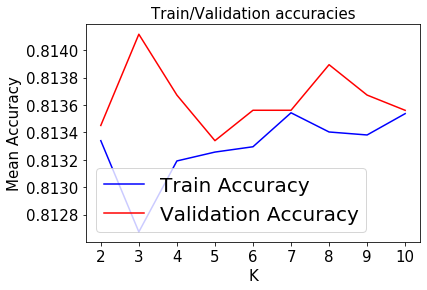

*********LR test/train roc_auc plot Line & Bar*********


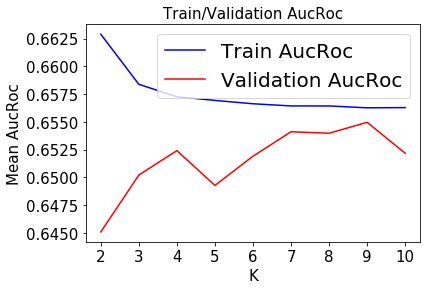

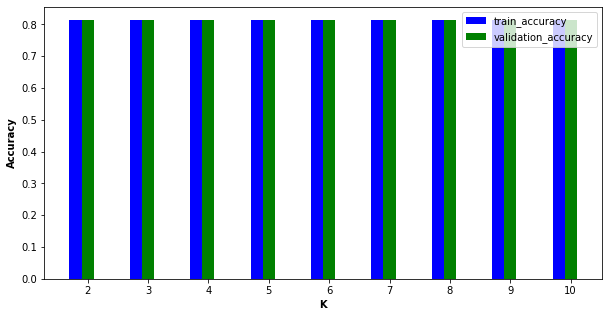

In [94]:
# I am doing cross validation ranging from 2 to 11 and plotting 
train_test_LR(selected_X,selected_y)